This assignment is about fitting a Linear Regression Model for the data. To do this assignment you are expected to complete till Week 2 of the prescribed course.
Make a folder named "Assignment 2", in the same repository that you submitted, and copy this notebook and the dataset to the directory. I won't be guiding you through to make commits, this time you have to decide your checkpoints to do the versioning.

The below cell has been left to import python modules.

In [84]:
import numpy as np
import csv
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression

Let's get started, open the file and import the two columns (they are comma separted values, google how to read csv lines). The first column represents your y values and the second column represents your x values. Make numpy arrays for y and x. Chose your naming convention of arrays as y and x only. (If you don't know how to read a file in python, google for it).

In [34]:
with open('data.txt') as csvfile:
    readCSV=csv.reader(csvfile,delimiter=',')
    x=np.array([])
    y=np.array([])
    for row in readCSV:
        x=np.append(x,float(row[1]))
        y=np.append(y,float(row[0]))

The very first step to handle a dataset is to draw first-hand inferences as much as possible. Those inferences play a very vital role while actually desinging and deciding models. The first step to do so is to have plots and compute some statistics of the data. We will only do a plot, if you want you can do further analysis. Using matplotlib plot a scatterplot of the y values against the x values. (again google if you don't know how to do)

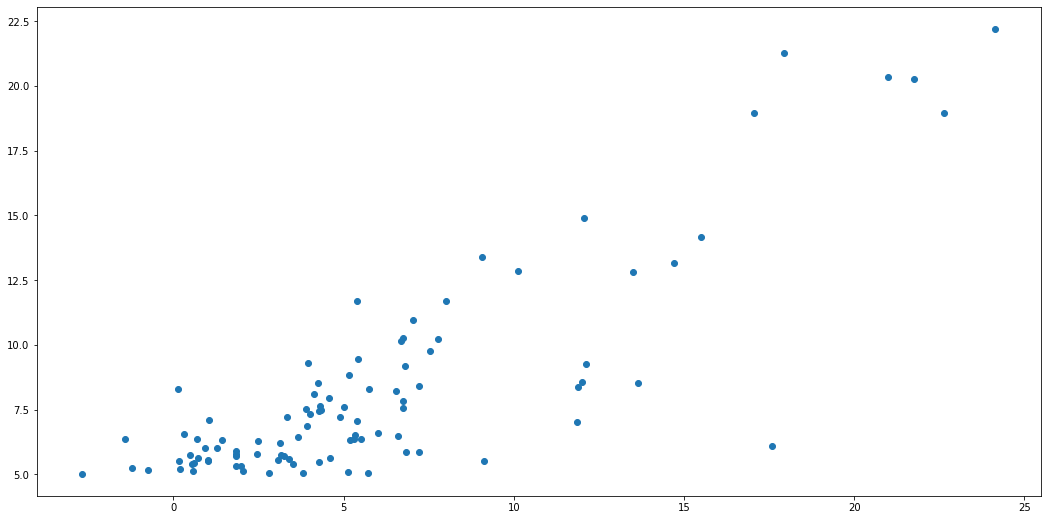

In [35]:
plt.figure(figsize=(18,9))
plt.scatter(x,y)
plt.show()

From the plot it seems that a linear fit to the available data is a plausible model (other than the fact that you haven't gone through other models yet :) ), so we have now decided we will perform a linear regression for the data using gradient descent. \
Let's have some revision...\
We have seen a sample cost function( we will use the same, but cost functions are very interesting, do try to think of some alternate cost functions too which can be good for linear fits )$$ J(\theta) = \frac{1}{2m}\Sigma_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
where $$ h_{\theta}(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

So as an implementation we will have a 1x2 vector theta( numpy will come handy ) and since we already have x vector and y vector, it's actually quite simple to implement $J(\theta)$.

Now recall the update step of $\theta$,
$$\theta_j = \theta_j - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$
So after choosing a parameter $\alpha$ we are good to go. Keep in mind that the update has to be done for all $\theta_j$s, you can do the simultaneous vectorized updates using numpy arrays.

Ok enough theory, lets implement a function. \
Implement function **gradientdescent(y, x, theta, alpha)** that returns a list of size 2 - [updatedtheta, currentcost] . Note - The current cost is the cost calculated with the updated $\theta$.

In [57]:
def gradientdescent(y, x, theta, alpha):
    diff0=diff1=float(0)
    for i in range(np.size(x)):
        diff0+=(theta[0]+theta[1]*x[i]-y[i])*(alpha)/(np.size(x))
        diff1+=(theta[0]+theta[1]*x[i]-y[i])*(alpha)*x[i]/np.size(x)
    theta[0]-=diff0
    theta[1]-=diff1
    currentcost=0
    for i in range(np.size(x)):
        currentcost+=((theta[0]+theta[1]*x[i]-y[i])**2)/(2*np.size(x))
    return[theta,currentcost]

Now it's time to call the function. Run for 1500 iterations (you can tweak it yourself too). Initialise your theta vector to [0,0] or you can even do randomly( will it matter? ). Take alpha to be 0.01( don't worry about tuning, you will know about it later ). Now run the loop and keep on updating theta and maintain an array where you keep on adding the cost values returned at each iteration. Store the final value of theta.

In [66]:
theta=[0,0]
cost=[]
for p in range(1500):
    returned=gradientdescent(y,x,theta,0.01)
    theta=returned[0]
    cost.append(returned[1])
print("Final theta is",theta)
print("Final cost is",cost[len(cost)-1])

Final theta is [4.71951908190659, 0.5888354137873362]
Final cost is 2.208189875526104


Now it's time to analyse again. Using matplotlib, plot y vs x and on the same plot draw the line $y = \theta_0 + \theta_1x $ using the final theta values obtained. Also plot the curve of the cost array against the no. of the iterations. If you want you can further change alpha and no. of iterations to check how they affect the regression.

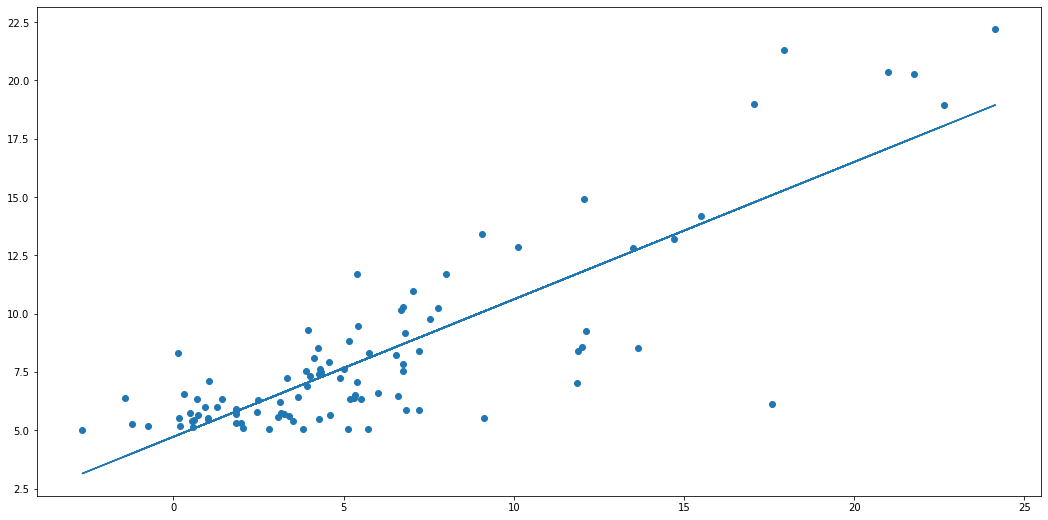

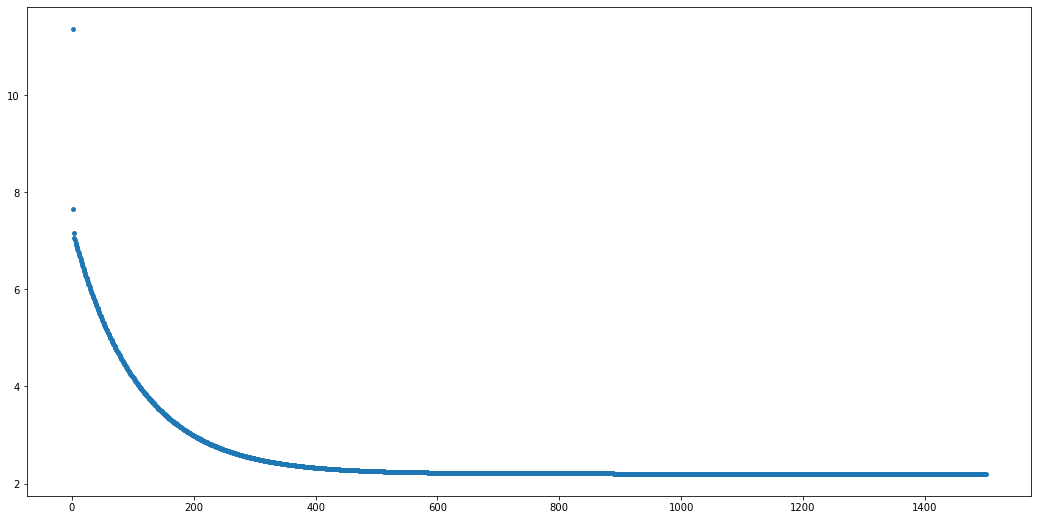

In [83]:
plt.figure(figsize=(18,9))
plt.scatter(x,y)
plt.plot(x,theta[0]+theta[1]*x)
plt.show()

iteration=list(range(len(cost)+1))
del iteration[0]

plt.figure(figsize=(18,9))
plt.scatter(iteration,cost,s=15)
plt.show()

You can see you have obtained a linear fit to the data. Welcome to Machine Learning.
With the help of the trained theta we can estimate the values for x's for which y's have not been measured. The iteration you did to update theta is called the training. And the weights( in this case theta ) obtained after training, can be saved for use in applications, and definitely it's not as easy as this everytime. 

Let's get going. You implemented linear regression from scratch, let's now look at a fascinating python library - scikit-learn (imported as sklearn). Find installation procedure and official documentation here- https://scikit-learn.org/stable/ . Now perform a linear regression directly using scikit-learn and plot the line(using slope and intercept obtained in the model). Here you don't even have to worry about chosing hyperparameter alpha. Do check out other features of the library too. Hint -https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

Final theta using gradient descent is [4.71951908190659, 0.5888354137873362]
Final theta using scikit is [4.723805488900442, 0.5884423772986025]


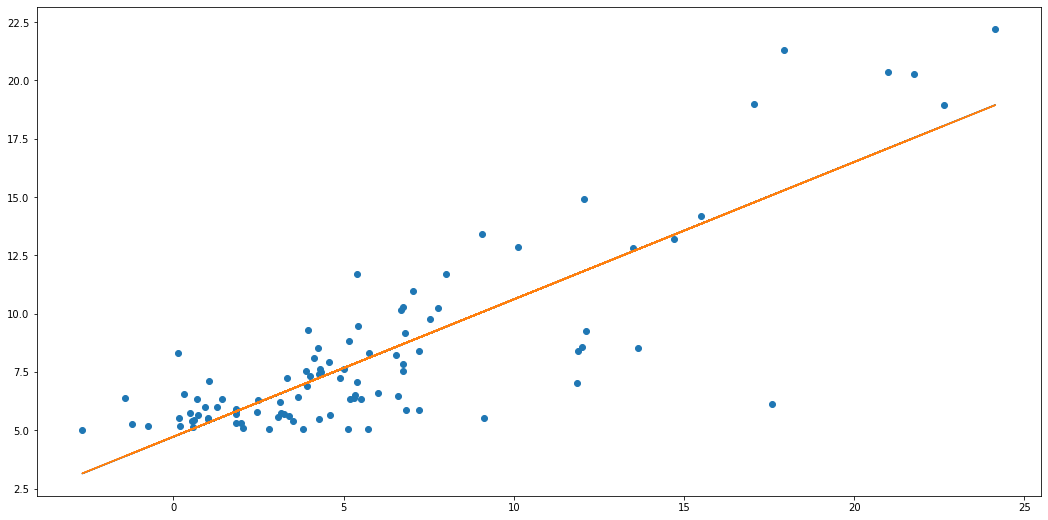

In [97]:
plt.figure(figsize=(18,9))
plt.scatter(x,y)
plt.plot(x,theta[0]+theta[1]*x)

x=x.reshape((-1,1))
model=LinearRegression().fit(x,y)
plt.plot(x,model.intercept_+model.coef_[0]*x) #new line completely covers the old line

print("Final theta using gradient descent is",theta)
print("Final theta using scikit is",[model.intercept_,model.coef_[0]])

plt.show() 

As you proceed through the course, do check-out their equivalent models in scikit-learn.